In [1]:
from IPython.display import display , Markdown
from numpy.random import uniform as np_uniform
from numpy.random import normal as np_normal
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from modules.Analysing import analyse_sequence , SequenceAnalyzer , GeneratorAnalyzer , level
from modules.Generators import OurGenerator , PythonGenerator


In [2]:
uni =np_uniform(0,1,size=5000)
nonm = np_normal(0,1,size=5000)


In [3]:
gran=[0.002,0.03,0.4,1.0]

In [4]:
analyzers = [SequenceAnalyzer(uni,name="seq_uni",granularities=gran),
             SequenceAnalyzer(nonm,name="seq_nonm",granularities=gran)]

In [5]:
for ana in analyzers:
    ana.run()
    print("-"*50)


start computing SequenceAnalyzer_seq_uni(alpha=5.0%)
compute for Chi2Test(nbbins=10)...33.3%...
compute for MaximumTest(groupsize=5)...66.7%...
compute for GapTest([ 0.1 , 0.4 ])...100.0%...
end computing
--------------------------------------------------
start computing SequenceAnalyzer_seq_nonm(alpha=5.0%)
compute for Chi2Test(nbbins=10)...33.3%...
compute for MaximumTest(groupsize=5)...66.7%...
compute for GapTest([ 0.1 , 0.4 ])...100.0%...
end computing
--------------------------------------------------


### Graphes de seq_uni(alpha=5.0%)

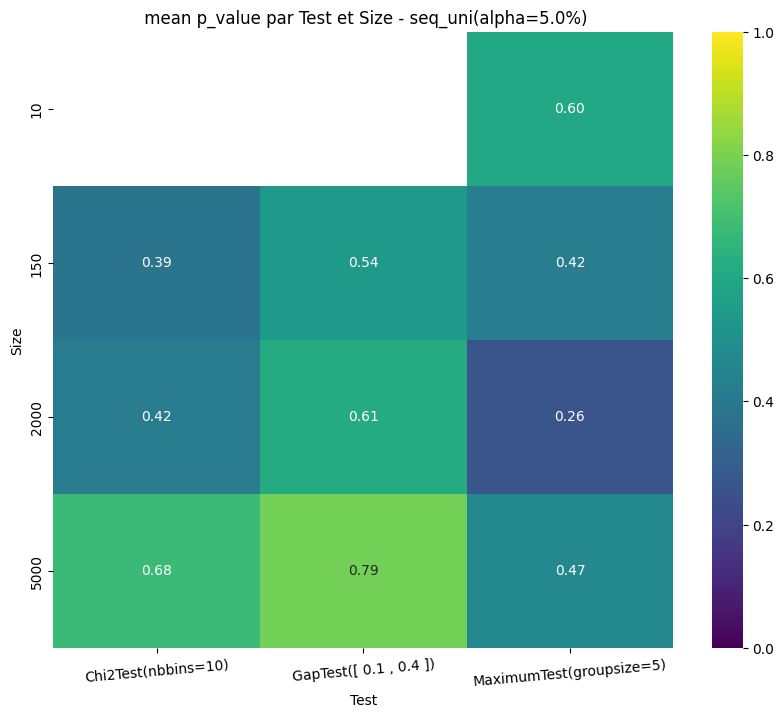

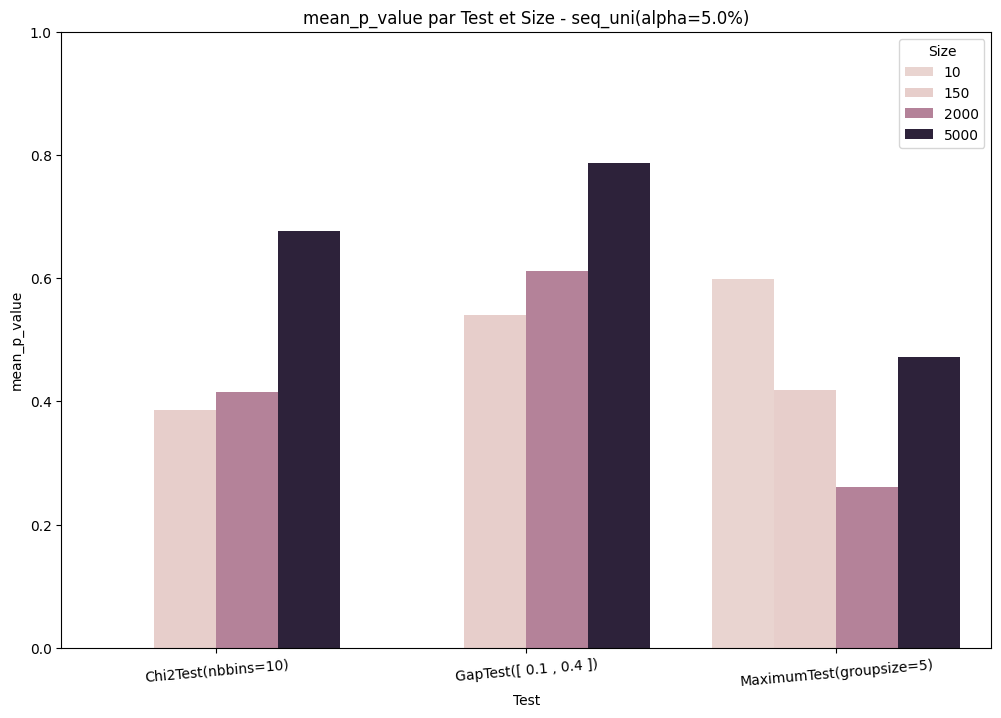

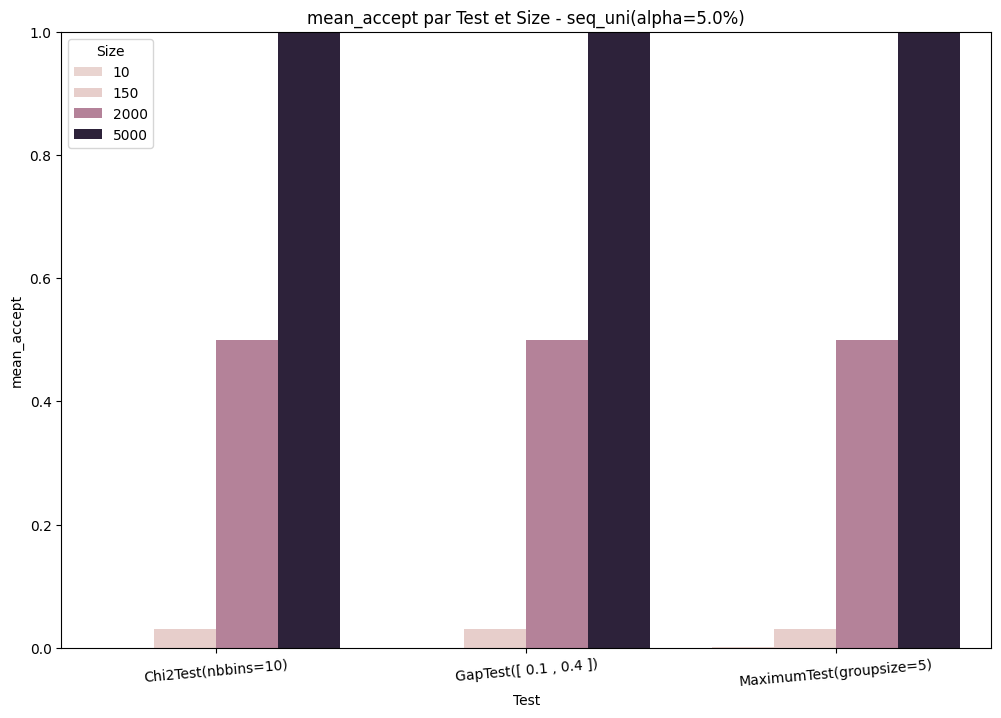

--------------------------------------------------


### Graphes de seq_nonm(alpha=5.0%)

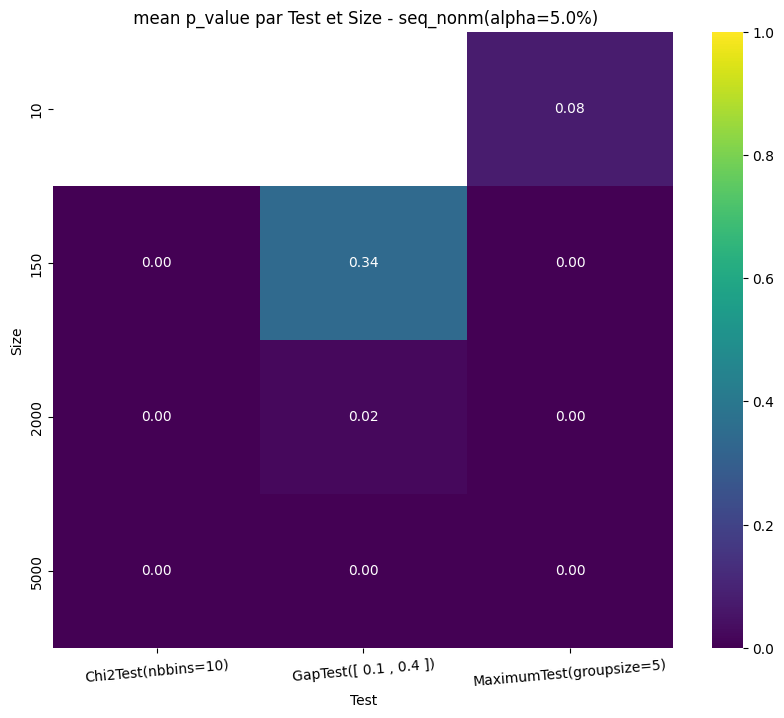

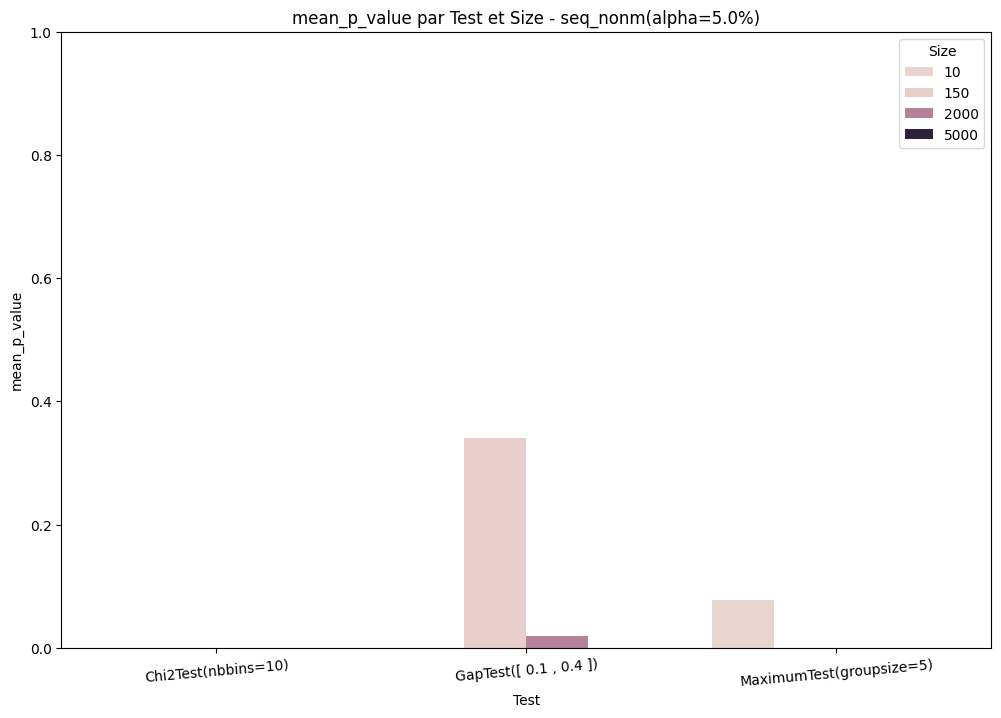

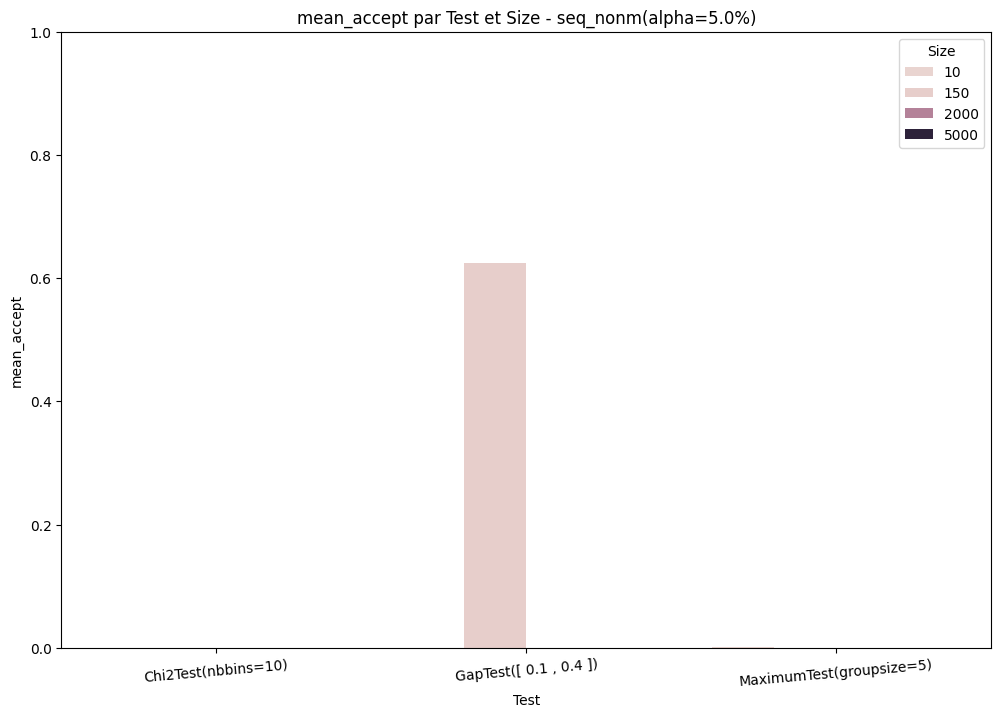

--------------------------------------------------


In [6]:
for ana in analyzers:
    display(Markdown(f"### Graphes de {ana.suffix()}"))
    ana.heatmap_by(metric="p_value")
    ana.barplot_by(by=[level.Bytest,level.Bysize],stat='mean_p_value')
    ana.barplot_by(by=[level.Bytest,level.Bysize],stat='mean_accept')
    print("-"*50)

In [7]:
from modules.compare import ComparatorGenerator


In [8]:
comp = ComparatorGenerator([PythonGenerator(),
                            OurGenerator(decimals=uni,
                                         suffix="uniform") ,
                            OurGenerator(decimals=nonm,
                                         suffix="non uniform")])


In [9]:
comp.run()

Début de l'évaluation des générateurs...
Évaluation de PythonGenerator...
start computing GeneratorAnalyzer_PythonGenerator(alpha=5%_k=200_n=10000)
0.0%
25.0%...
50.0%...
75.0%...
100.0%...
Évaluation de OurGenerator_uniform...
start computing GeneratorAnalyzer_OurGenerator_uniform(alpha=5%_k=200_n=10000)
0.0%
25.0%...
50.0%...
75.0%...
100.0%...
Évaluation de OurGenerator_non uniform...
start computing GeneratorAnalyzer_OurGenerator_non uniform(alpha=5%_k=200_n=10000)
0.0%
25.0%...
50.0%...
75.0%...
100.0%...
Tous les générateurs ont été évalués.


In [11]:
display(comp.compare_barplot)

<bound method ComparatorGenerator.compare_barplot of ComparatorGenerator(generators=[<modules.Generators.PythonGenerator object at 0x0000012CE8876F90>, <modules.Generators.OurGenerator object at 0x0000012CE8877CB0>, <modules.Generators.OurGenerator object at 0x0000012CEB294690>], tests=None, granularities=None, alpha=0.05, n_repeat=200, seq_len=10000, runed=True, results={'PythonGenerator': GeneratorAnalyzer_PythonGenerator(alpha=5%_k=200_n=10000), 'OurGenerator_uniform': GeneratorAnalyzer_OurGenerator_uniform(alpha=5%_k=200_n=10000), 'OurGenerator_non uniform': GeneratorAnalyzer_OurGenerator_non uniform(alpha=5%_k=200_n=10000)})>